# K Means Clustering
This notebook will build K-means clustering from scratch, tthen implement it with the [IBMEmployeeAttrition](https://github.com/Madison-Bunting/INDE-577/blob/main/IBMEmployeeAttrition.csv) dataset.

In [150]:
#Always include important imports at the top
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV
import random

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#importing the dataset as a dataframe
df = pd.read_csv("https://raw.githubusercontent.com/Madison-Bunting/INDE-577/main/IBMEmployeeAttrition.csv")

## Pre-Processing
Preprocess the data by removing variables with zero variance (as uncovered in the [Exploring A New Dataset](https://github.com/Madison-Bunting/INDE-577/blob/main/Exploring%20a%20New%20Dataset.ipynb) Notebook, and encode categorical variables so they can be used as part of the analysis.

In [151]:
#Drop variables with zero variance: EmployeeCount, Over18, and StandardHours
df.drop('EmployeeCount', axis = 1, inplace = True)
df.drop('Over18', axis = 1, inplace = True)
df.drop('StandardHours', axis = 1, inplace = True)

In [152]:
#Create a function which takes the dataset as input and ouputs the processed dataset
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['Education'] = le.fit_transform(res_df['Education'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    res_df['Attrition'] = le.fit_transform(res_df['Attrition'])
    return res_df

#Run the function on the desired dataset
encoded_df = preprocessor(df)

# K-Means Clustering from scratch
The cell below contains a class, k_means_clustering, that executes the algorithm described in the ReadMe for this folder: for a given k, it selects k random points to be the initial centroids, then calculates the distance from each feature vector to each centroid and assigns each datapoint to a centroid. It then updates the clusters and recalculates the centroids, and updates the assignment of datapoints until it reaches maximum iterations.

In [153]:
class k_means_clustering():
    def __init__(self, k = 3, max_iter = 100, epsilon = 0.01) -> None:
        self.X = None
        self.k = k
        self.max_iter = max_iter
        self.epsilon = epsilon
        self.centroid_history = None
        self.final_centroids = None

    def fit(self, X):
        self.X = X
        C_old = self.initialize_centroids()
        C_new = self.new_centroids(C_old)
        self.centroid_history = [C_old, C_new]
        centroid_distances = [self.distance(p[0], p[1]) for p in zip(C_old, C_new)]

        iter = 0
        while max(centroid_distances) > self.epsilon and iter<self.max_iter:
            C_old, C_new = C_new, self.new_centroids(C_new)
            self.centroid_history.append(C_new)
            centroid_distances = [self.distance(p[0], p[1]) for p in zip(C_old, C_new)]
            iter += 1
        self.final_centroids = C_new

    def initialize_centroids(self):
        centroids = []
        for _ in range(self.k):
            i = np.random.randint(len(self.X))
            centroids.append(self.X[i, :])
        return centroids

    def new_centroids(self, centroids):
        new_centroids = []
        A = self.make_classes(centroids)
        for i in range(len(centroids)):
            if len(A[i])>0:
                new_centroids.append(1/len(A[i])*sum(A[i])) 
        return new_centroids

    def distance(self, a, b):
        return np.sqrt((a-b)@(a-b))

    def clustering(self, x, centroids):
        distances = np.array([self.distance(x, centroid) for centroid in centroids])
        return np.argmin(distances)

    def make_classes(self, centroids):
        A = dict()
        for i in range(len(centroids)):
            A[i] = []
        for x in self.X:
            A[self.clustering(x, centroids)].append(x)
        return A

    def predict_classes(self, data, centroids):
        A = dict()
        for i in range(len(centroids)):
            A[i] = []
        for x in data:
            A[self.clustering(x, centroids)].append(x)
        return A
    
    def mse_classes(self, centroids):
        errors = []
        A_classes = self.make_classes(centroids)
        for i, centroid in enumerate(centroids):
            error = sum(.5*(centroid-a)@(centroid-a) for a in A_classes[i])
            errors.append(error)
        return sum(errors)

## Implementation
The cell below defines which variables we would like to use for clustering.

In [171]:
X = np.asarray(encoded_df[['MonthlyIncome','YearsAtCompany']])

The following cell runs k means with 2 clusters, reports the centroids and graphs the color-coded results in a scatterplot. 

[array([1.40604939e+04, 1.19272727e+01]), array([4315.21578947,    5.58421053])]


Text(0, 0.5, 'YearsAtCompany')

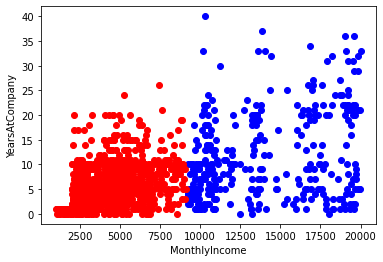

In [172]:
k_means = k_means_clustering(k=2, max_iter=100, epsilon=0.01)
k_means.fit(X)

centroids = k_means.final_centroids
print(centroids)

clusters = k_means.predict_classes(X, k_means.final_centroids)
for label, _ in clusters.items():
    for x in clusters[label]:
        if label == 0:
            plt.scatter(x[0],x[1],color = "blue")
        else:
            plt.scatter(x[0],x[1],color = "red")
plt.xlabel('MonthlyIncome')
plt.ylabel("YearsAtCompany")

It appears this dataset does not have 2 clear clusters along these variables. The function below outputs the centroids and final MSE, as well as a graph of error over the course of the training process, for the number of clusters up to and including k to observe which value of k is the best fit for the dataset.

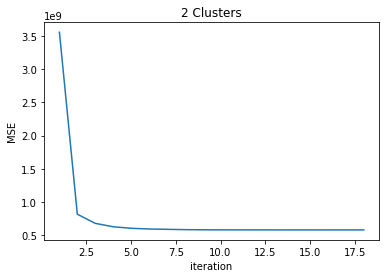

Centroids for 2 clusters: [array([2727.16007194,    4.11870504]), array([1.81432946e+04, 1.41705426e+01]), array([5392.86004057,    6.6673428 ]), array([9.33399526e+03, 9.13744076e+00]), array([1.32638272e+04, 1.19629630e+01])]
MSE for 2 clusters: 576621216.619


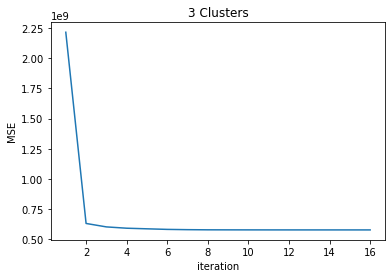

Centroids for 3 clusters: [array([9.33399526e+03, 9.13744076e+00]), array([2727.16007194,    4.11870504]), array([1.32638272e+04, 1.19629630e+01]), array([1.81432946e+04, 1.41705426e+01]), array([5392.86004057,    6.6673428 ])]
MSE for 3 clusters: 576621216.619


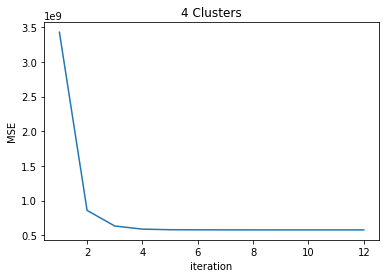

Centroids for 4 clusters: [array([2727.16007194,    4.11870504]), array([1.32638272e+04, 1.19629630e+01]), array([9.33399526e+03, 9.13744076e+00]), array([5392.86004057,    6.6673428 ]), array([1.81432946e+04, 1.41705426e+01])]
MSE for 4 clusters: 576621216.619


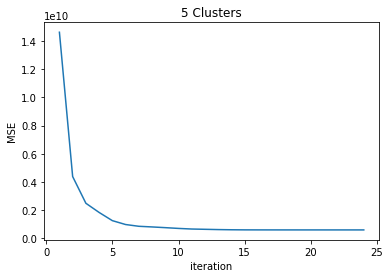

Centroids for 5 clusters: [array([1.79638613e+04, 1.38686131e+01]), array([4822.39467312,    6.57384988]), array([2602.67196819,    3.99204771]), array([7269.58078603,    7.28384279]), array([1.13443245e+04, 1.06968085e+01])]
MSE for 5 clusters: 602839915.87


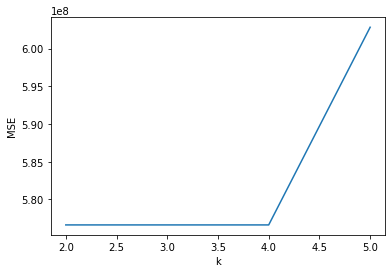

In [168]:
def k_means_compare(k, max_iter, epsilon):
    mse_list = []
    
    for j in range(1,k):
        k_means = k_means_clustering(k, max_iter, epsilon)
        k_means.fit(X)
        
        centroids = k_means.final_centroids
        mse = k_means.mse_classes(centroids)
        mse_list.append(mse)
        errors = [k_means.mse_classes(centroid) for centroid in k_means.centroid_history]
        
        #plot the MSE for a given k over a given number of iterations
        plt.figure()
        plt.plot([i for i in range(1,len(errors)+1)], errors)
        plt.title(f'{j+1} Clusters')
        plt.xlabel('iteration')
        plt.ylabel("MSE")
        plt.show()
        
        print("Centroids for", j + 1, "clusters:", centroids)
        print("MSE for", j + 1, "clusters:", round(mse, 3))

    #plot the MSE over the values of k to determine which k is best
    plt.figure()
    plt.plot([i for i in range(2,len(mse_list)+2)], mse_list)
    plt.xlabel('k')
    plt.ylabel("MSE")
    plt.show()
        
#calling the function                
k_means_compare(5, 100, 0.01)

Typically, as k increases, MSE must decrease until k is equal to the number of datapoints, so we should see the graph start at a high MSE and decrease as k decreases. From these results, it is very apparent that k > 2 does not produce a better result than k = 2, and k > 4 produces worse clusters.